### str型の基本操作

In [29]:
a = "こんにちは。こんばんは。ありがとうございます。"
b = "ABCDE"

In [22]:
a.count("こん")

2

In [25]:
a.replace("こ","")

'んにちはん'

In [31]:
a.split("。")

['こんにちは', 'こんばんは', 'ありがとうございます', '']

In [35]:
a.find("ん")

1

### str型とif文

In [49]:
a = "abcde.TXT"

if a.lower().endswith(".txt"):
    print("txtです")
else:
    print("txtじゃないです")

txtです


### 表記揺れ対策

In [47]:
c = "I am Steve Jobs."
c.lower()

'i am steve jobs.'

In [57]:
import mojimoji
d = "ABC123アイウエオ"
mojimoji.zen_to_han(d,kana=False,digit=False,ascii=False)

'ABC123アイウエオ'

### 形態素解析

In [80]:
import MeCab

#text = "私は昨日、美味しいカレーライスを食べました。食べたい。食べれば。私はラーメンも好きです。"

f = open("kokoro.txt")
text = f.read()
f.close()

m = MeCab.Tagger("-Ochasen")
node = m.parseToNode(text)

meishi_list = []
doshi_list = []
keiyoshi_list = []

while node:
    if node.feature.split(",")[0] == "名詞":
        meishi_list.append(node.surface)
    elif node.feature.split(",")[0] == "動詞":
        doshi_list.append(node.feature.split(",")[6])
    elif node.feature.split(",")[0] == "形容詞":
        keiyoshi_list.append(node.feature.split(",")[6])

    node = node.next


In [82]:
meishi_list

['私',
 '気',
 '私',
 '先生',
 '知り合い',
 'の',
 '鎌倉',
 'はず',
 '彼',
 '事',
 '私',
 '一',
 '人',
 '学校',
 '授業',
 '大分',
 '宿',
 '面倒',
 'の',
 '宿',
 '鎌倉',
 '辺鄙',
 '一つ',
 '手',
 '車',
 '二',
 '十',
 '銭',
 '個人',
 '別荘',
 'そこ',
 'ここ',
 'いくつ',
 'それ',
 '海',
 '海水浴',
 '便利',
 '地位',
 '私',
 '毎日',
 '海',
 'の',
 '愉快',
 '私',
 '先生',
 '雑沓',
 '事',
 '私',
 '西洋',
 '人',
 '皮膚',
 '色',
 '掛茶屋',
 '否',
 '前',
 '西洋',
 '人',
 '彼',
 '自分',
 '傍',
 'ところ',
 'それ',
 '否',
 '頭',
 '海',
 '方',
 '人',
 '先生',
 '私',
 '好奇',
 '心',
 'ため',
 '浜辺',
 '二',
 '人',
 '後姿',
 '着物',
 'どこ',
 '彼ら',
 '後',
 '時',
 '私',
 '屈托',
 '手',
 '掛茶屋',
 '先生',
 '着物',
 '外',
 '私',
 '姿',
 '先生',
 'いつ',
 '一',
 '人',
 'の',
 '下',
 '首',
 '手',
 '突',
 'ッ',
 '眼鏡',
 '先生',
 'それ',
 '私',
 '手',
 '次',
 '日',
 '私',
 '先生',
 '後',
 '青空',
 '色',
 '眼',
 'よう',
 '痛烈',
 '色',
 '私',
 '顔',
 '愉快',
 '私',
 '声',
 '海',
 '中',
 'よう',
 '姿勢',
 '先生',
 '私',
 '体質',
 '私',
 '海',
 '中',
 '先生',
 '時',
 '私',
 '二',
 '人',
 '元',
 '路',
 '浜辺',
 '私',
 '先生',
 '懇意',
 '先生',
 'どこ',
 'それ',
 '先生',
 'これ',
 '私',
 '口',
 '先生',
 '言葉',
 '始まり',
 '私',
 '晩',

### 頻出単語の抽出

In [86]:
import collections
c = collections.Counter(keiyoshi_list)
c.most_common(30)

[('ない', 175),
 ('悪い', 31),
 ('好い', 24),
 ('強い', 19),
 ('早い', 19),
 ('いい', 16),
 ('長い', 13),
 ('新しい', 12),
 ('若い', 11),
 ('よい', 10),
 ('人間らしい', 9),
 ('深い', 8),
 ('珍しい', 7),
 ('苦しい', 7),
 ('むずかしい', 7),
 ('恐ろしい', 7),
 ('暗い', 7),
 ('淋しい', 6),
 ('悲しい', 6),
 ('面白い', 6),
 ('古い', 5),
 ('広い', 5),
 ('黒い', 5),
 ('赤い', 5),
 ('重い', 5),
 ('多い', 5),
 ('近い', 4),
 ('美しい', 4),
 ('軽い', 4),
 ('忙しい', 4)]

### ワードクラウドの作成

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 599.5, 399.5, -0.5)

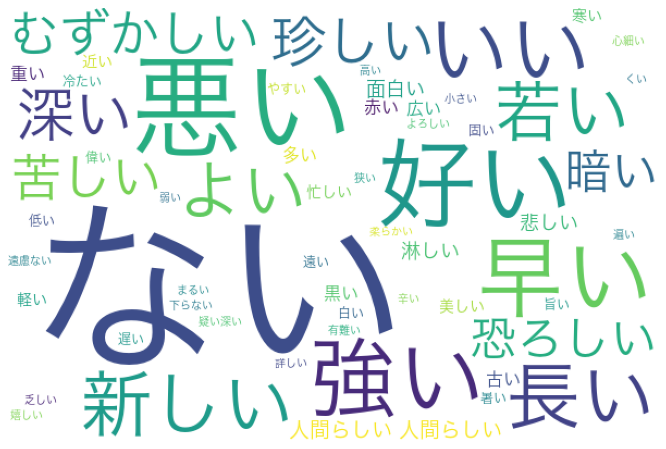

In [105]:
wordcloud = WordCloud(font_path="/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc",
                     background_color = "white",
                     width = 600,
                     height = 400,
                     min_font_size = 10,
                     prefer_horizontal = 1.0)
wordcloud.generate(" ".join(keiyoshi_list))

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis("off")

'私 気 私 先生 知り合い の 鎌倉 はず 彼 事 私 一 人 学校 授業 大分 宿 面倒 の 宿 鎌倉 辺鄙 一つ 手 車 二 十 銭 個人 別荘 そこ ここ いくつ それ 海 海水浴 便利 地位 私 毎日 海 の 愉快 私 先生 雑沓 事 私 西洋 人 皮膚 色 掛茶屋 否 前 西洋 人 彼 自分 傍 ところ それ 否 頭 海 方 人 先生 私 好奇 心 ため 浜辺 二 人 後姿 着物 どこ 彼ら 後 時 私 屈托 手 掛茶屋 先生 着物 外 私 姿 先生 いつ 一 人 の 下 首 手 突 ッ 眼鏡 先生 それ 私 手 次 日 私 先生 後 青空 色 眼 よう 痛烈 色 私 顔 愉快 私 声 海 中 よう 姿勢 先生 私 体質 私 海 中 先生 時 私 二 人 元 路 浜辺 私 先生 懇意 先生 どこ それ 先生 これ 私 口 先生 言葉 始まり 私 晩 先生 宿 宿 普通 旅館 寺 境内 人違い 私 変 一種 失望 私 め 私 事 先生 失望 先生 それ よう よう 私 軽微 失望 それ ため 先生 気 それ 反対 不安 前 自分 軽蔑 もの 私 先生 つもり 東京 授業 二 週間 日数 私 心 私 往来 学生 顔 たび 学年 希望 緊張 私 先生 事 授業 一 カ月 私 心 一種 私 頭 先生 顔 私 先生 先生 宅 奥さん 人 奥さん 私 人 鄭 寧 私 日 近く 出し抜け 先生 声 先生 私 顔 先生 言葉 二 遍 私 後 の 先生 態度 むしろ 落ち 声 表情 中 よう 一種 私 私 ここ 先生 誰 人 名 事 何 それ はず あなた 必要 ん 先生 得心 ら 先生 私 通り 墓 間 撒伯 拉何 墓 前 これ ん 先生 アンドレ つもり 先生 苦笑 先生 これら 墓標 人種 事 私 先生 それ ぎり 何 墓地 区切り 目 銀杏 よう 先生 月 一 度 木の下 の 向う 方 凸凹 手 私 たち 私 たち そこ 左 街道 どこ 目的 私 はさ 窮屈 いっしょ 宅 帰り 所 二 人 南 方 坂 先生 宅 墓地 あすこ ん 私 口 どなた 墓 ん 親類 墓 先生 これ 以外 何 私 話 それ ぎりにして 一 町 先生 不意 そこ あすこ 私 友達 墓 ん 友達 墓 毎月 お参り ん 先生 日 これ 以外 私 それ 先生 訪問 よう たび 先生 在宅 先生 度